PART-1 IMPORT IMAGE 


In [ ]:

import cv2
# Opencv: is an open source library which is very useful for computer vision applications such as  image analysis
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

#include the following since we are running on Google Colab
from google.colab.patches import cv2_imshow #This will help in displaying the image as we continue to modify it
from google.colab import files #This will help us to select any image from our local files for editing

In [ ]:
def read_file(filename):
  img = cv2.imread(filename)
  #cv2.imread() method loads an image from the specified file.
  img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
 # cv2_imshow(img)
  return img

Saving aman23.jpg to aman23 (1).jpg


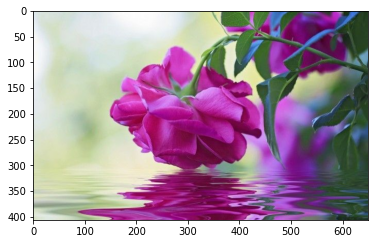

In [ ]:
uploaded = files.upload()
filename = next(iter(uploaded))
img = read_file(filename)

In [ ]:
org_img=np.copy(img)

PART 2: CREATING AN EDGE MASK

In [ ]:
#input:input scale image
#output:edges of images

def edge_marks(img,line_size,blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray,blur_value)
    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,line_size,blur_value)#To access the edges, we use the cv2.adaptiveThreshold
    return edges

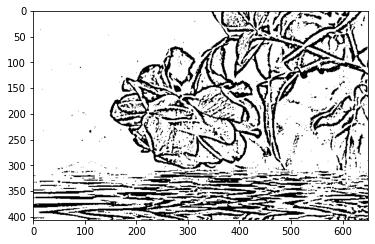

In [ ]:
#different type of the outline of the image
## we can change the thickness of edges by changing the values below
line_size,blur_value=9,3
edges= edge_marks(img,line_size,blur_value)
plt.imshow(edges,cmap="gray")
plt.show()

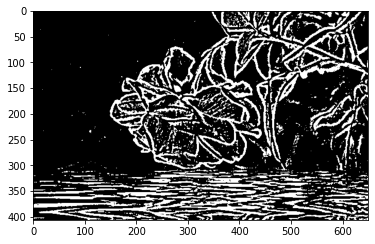

In [ ]:
line_size,blur_value=9,3
edges=edge_marks(img,line_size,blur_value)
plt.imshow(edges,cmap="binary")
plt.show()

PART 3: REDUCING THE NUMBER OF DISTINCT COLOURS

In [ ]:
def color_quantization(img,k):
#k show here the no number of the colour we want in our image

#transform the image
 data = np.float32(img).reshape((-1,3))
 criteria=(cv2.TERM_CRITERIA_EPS+ cv2.TermCriteria_MAX_ITER,20,0.001)
 ret, label, center= cv2.kmeans( data, k,None, criteria, 10,cv2.KMEANS_RANDOM_CENTERS )
 center=np.uint8(center)
 result=center[label.flatten()]
 result=result.reshape(img.shape) 
  

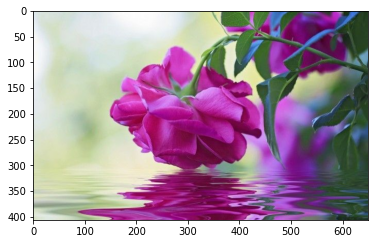

In [ ]:
img_quantiz= color_quantization(img, k=1)
# By changing the value of k we can increase/decrease , the no of colour in the image can be change
plt.imshow(img)
plt.show()

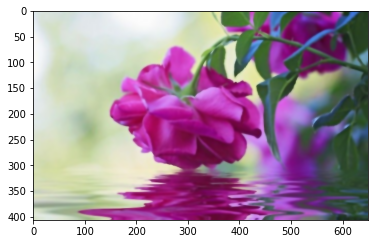

In [ ]:
#redue the noise(the presence of artifacts that do not originate from the original scene content)
blurred = cv2.bilateralFilter(img,d=7,sigmaColor=200,sigmaSpace=200)
#'d' here is the diameter of each pixcel of the image.
# sigmacolor: Filter sigma in the color space., sigmaSpace - Filter sigma in the coordinate space. 
plt.imshow(blurred)
plt.show()

PART 4: COMBINING THE EDGE MASK WITH THE REDUCED-COLOUR IMAGE

In [ ]:
def cartoon():
    c=cv2.bitwise_and(blurred,blurred,mask=edges)
    #bitwise operation on the two images returns an image with the merging done as per the specification.
    plt.imshow(org_img)
    plt.title("orginal_image")
    plt.show()
    plt.imshow(c)
    plt.title("cartoonify_image")
    plt.show()

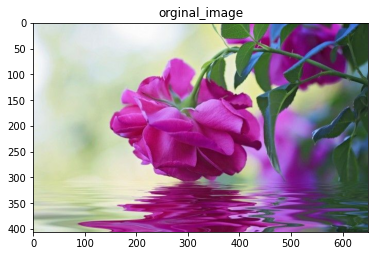

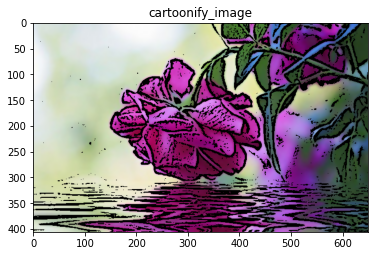

In [ ]:
#to show two different image orginal/cartoonify  
cartoon()